In [1]:
from datasets import load_dataset
from collections import Counter
from matplotlib import pyplot as plt


In [2]:
inquisitive_data = (
    load_dataset("inquisitive_qg", split="train+validation+test")
    .select_columns(["context", "question"])
    .rename_columns({"context": "source", "question": "target"})
)

C:\Users\omarz\Documents\University\mmqg\.venv\lib\site-packages\datasets\load.py:1429: FutureWarning: The repository for inquisitive_qg contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/inquisitive_qg
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


FileNotFoundError: Couldn't find file at https://github.com/wjko2/INQUISITIVE/raw/master/articles.tgz

In [3]:
dataset_count = inquisitive_data.shape[0]
dataset_count

NameError: name 'inquisitive_data' is not defined

In [5]:
def add_unigram(example):
    example["unigram"] = " ".join(example["target"].split(" ")[:1])
    return example

leading_unigram = adversarial_data.map(add_unigram)

unigram_leading_word_counts = Counter(leading_unigram["unigram"])

most_common_bigram_leading_words = unigram_leading_word_counts.most_common(10)
print(f"{'Unigram': <20}{'Percentage': <10}")
print("-" * 30)
for word, count in most_common_bigram_leading_words:
    p = count / dataset_count * 100
    print(f"{word: <20}{p:.2f}%")


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Unigram             Percentage
------------------------------
What                40.33%
Which               10.22%
Who                 7.74%
How                 6.88%
what                4.95%
Where               4.02%
The                 3.36%
Why                 2.55%
When                1.98%
In                  1.57%


## Most Frequent Leading Bigram

In [6]:
from collections import Counter

def add_bigram(example):
    example["bigram"] = " ".join(example["target"].split(" ")[:2])
    return example

leading_bigram = adversarial_data.map(add_bigram)

bigram_leading_word_counts = Counter(leading_bigram["bigram"])

most_common_bigram_leading_words = bigram_leading_word_counts.most_common(10)
print(f"{'Bigram': <20}{'Percentage': <10}")
print("-" * 30)
for word, count in most_common_bigram_leading_words:
    p = count/dataset_count*100
    print(f"{word: <20}{p:.2f}%")

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Bigram              Percentage
------------------------------
What is             8.88%
What was            5.17%
Which of            3.29%
What did            2.54%
what is             2.01%
What does           1.84%
Who was             1.78%
How did             1.45%
What happened       1.43%
What are            1.07%


## Distribution of Target and Source Length

In [8]:
from transformers import T5Tokenizer, BartTokenizer


bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
t5_tokenizer = T5Tokenizer.from_pretrained('t5-small')


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
def add_target_tokens(example):
    example["bart"] = len(bart_tokenizer.tokenize(example["target"]))
    example["t5"] = len(t5_tokenizer.tokenize(example["target"]))
    return example

question_length = adversarial_data.map(add_target_tokens)
question_length[0]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

{'source': 'Another approach to brain function is to examine the consequences of damage to specific brain areas. Even though it is protected by the skull and meninges, surrounded by cerebrospinal fluid, and isolated from the bloodstream by the blood–brain barrier, the delicate nature of the brain makes it vulnerable to numerous diseases and several types of damage. In humans, the effects of strokes and other types of brain damage have been a key source of information about brain function. Because there is no ability to experimentally control the nature of the damage, however, this information is often difficult to interpret. In animal studies, most commonly involving rats, it is possible to use electrodes or locally injected chemicals to produce precise patterns of damage and then examine the consequences for behavior.',
 'target': 'What sare the benifts of the blood brain barrir?',
 'bart': 13,
 't5': 19}

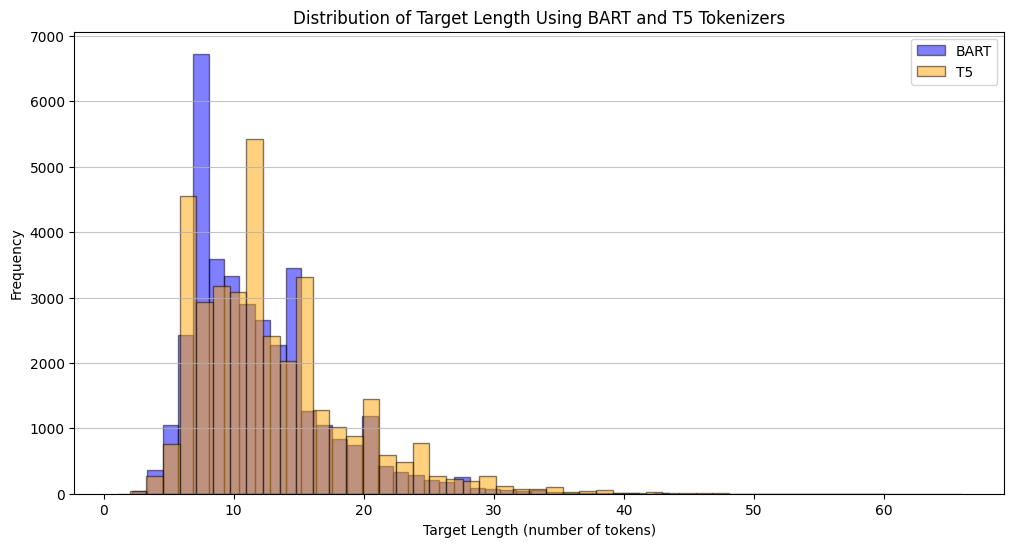

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(question_length["bart"], bins=50, alpha=0.5, label='BART', color='blue', edgecolor='black')
plt.hist(question_length["t5"], bins=50, alpha=0.5, label='T5', color='orange', edgecolor='black')
plt.title('Distribution of Target Length Using BART and T5 Tokenizers')
plt.xlabel('Target Length (number of tokens)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [11]:
def add_source_tokens(example):
    example["bart"] = len(bart_tokenizer.tokenize(example["source"]))
    example["t5"] = len(t5_tokenizer.tokenize(example["source"]))
    return example

source_length = adversarial_data.map(add_source_tokens)
source_length[0]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

{'source': 'Another approach to brain function is to examine the consequences of damage to specific brain areas. Even though it is protected by the skull and meninges, surrounded by cerebrospinal fluid, and isolated from the bloodstream by the blood–brain barrier, the delicate nature of the brain makes it vulnerable to numerous diseases and several types of damage. In humans, the effects of strokes and other types of brain damage have been a key source of information about brain function. Because there is no ability to experimentally control the nature of the damage, however, this information is often difficult to interpret. In animal studies, most commonly involving rats, it is possible to use electrodes or locally injected chemicals to produce precise patterns of damage and then examine the consequences for behavior.',
 'target': 'What sare the benifts of the blood brain barrir?',
 'bart': 149,
 't5': 160}

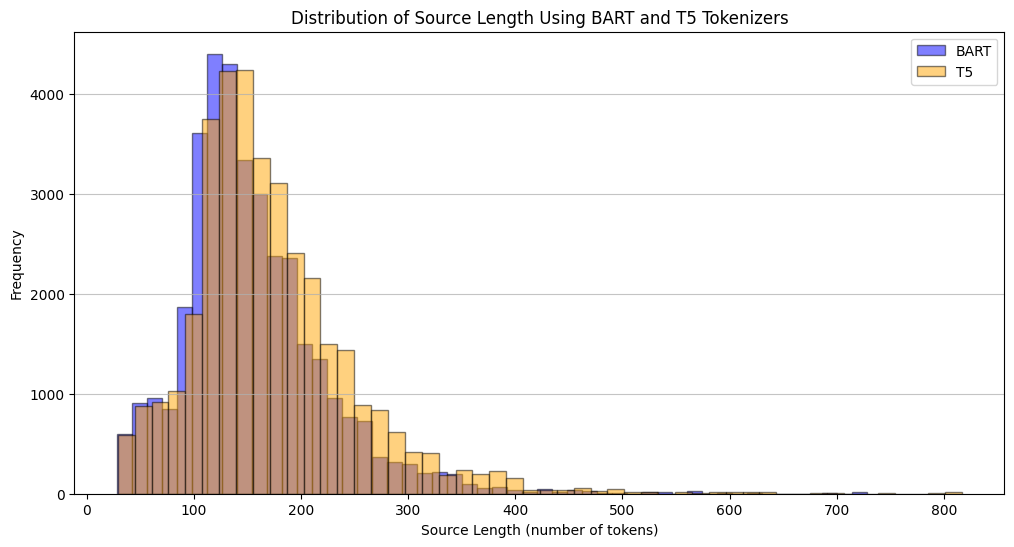

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(source_length["bart"], bins=50, alpha=0.5, label='BART', color='blue', edgecolor='black')
plt.hist(source_length["t5"], bins=50, alpha=0.5, label='T5', color='orange', edgecolor='black')
plt.title('Distribution of Source Length Using BART and T5 Tokenizers')
plt.xlabel('Source Length (number of tokens)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()